In [1]:
from keras.datasets import cifar10

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

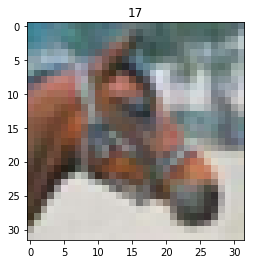

In [5]:
idx = 17
x = x_test[idx]

plt.imshow(x)
plt.title(idx)
plt.show()

In [7]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 32, 32, 3)

In [24]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
        plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
        plt.imshow(img)
    plt.show()

In [29]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

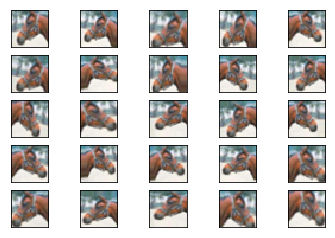

In [31]:
max_img_num = 25
imgs = []
for d in datagen.flow(x, batch_size=1):
    imgs.append(image.array_to_img(d[0], scale=True))
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=5, col=5)